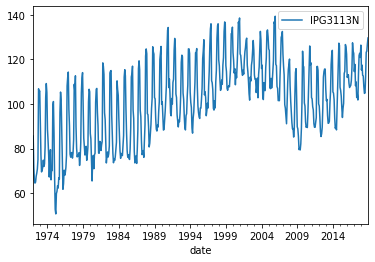

In [47]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the time series
candy = pd.read_csv('data/candy_production.csv', 
                 index_col='date',
                 parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

### Splitting into test-train

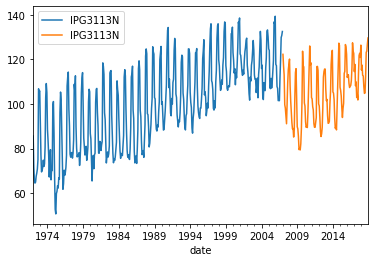

In [28]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

Amazon Stock Price

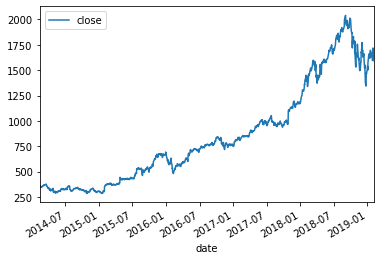

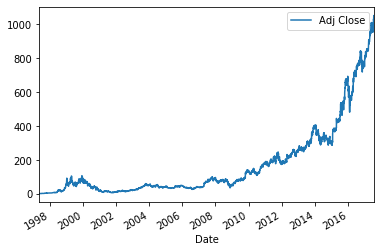

In [29]:
amazon = pd.read_csv('data/amazon_close.csv', 
                 index_col='date', 
                 parse_dates=True)

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
amazon.plot(ax=ax)
plt.show()

amazon_prct_change = pd.read_csv('data/AMZN.csv', 
                 index_col='Date', 
                 parse_dates=True)

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
amazon_prct_change.plot(ax=ax)
plt.show()

The above two series are non-stationary, as they have an upward trend.

### Converting them to non-stationary: Conducting tests<br><br>

#### Dickey Fuller Test<br><br>

Null Hypothesis -> Time Series is non-stationary <br><br>

Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.<br><br>

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!<br><br>

The earthquakes DataFrame has been loaded in for you as earthquake.

In [30]:
amazon_prct_change.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [31]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(amazon_prct_change['Adj Close'])

print(result)

# Print test statistic
print("test-statistics : ",result[0])

# Print p-value
print("p-value : ",result[1])

# Print critical values
print("critical values : ",result[4]) 

(4.02516852577074, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
test-statistics :  4.02516852577074
p-value :  1.0
critical values :  {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}


#### Performing the transformation - Taking the differences

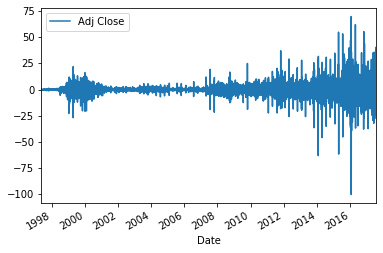

ADF Statistic: -21.53616689489994
p-value: 0.0


In [32]:
# Calculate the first difference of the time series
amazon_prct_change_stationary = amazon_prct_change.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(amazon_prct_change_stationary['Adj Close'])

# Plot the differenced time series
fig, ax = plt.subplots()
amazon_prct_change_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

#### Other transformations - log_return

In [49]:
amazon_prct_change['shift'] = amazon_prct_change.shift(1)["Adj Close"]
amazon_prct_change.dropna(inplace = True)
amazon_prct_change['log_return'] = np.log(amazon_prct_change["Adj Close"] / amazon_prct_change['shift'])
amazon_prct_change

,Adj Close,shift,log_return
Date,,,
1997-05-22,1.395833,1.427083,-0.022141
1997-05-23,1.500000,1.395833,0.071974
1997-05-27,1.583333,1.500000,0.054067
1997-05-28,1.531250,1.583333,-0.033448
1997-05-29,1.505208,1.531250,-0.017153
...,...,...,...
2017-07-27,1046.000000,1052.800049,-0.006480
2017-07-28,1020.039978,1046.000000,-0.025132
2017-07-31,987.780029,1020.039978,-0.032137


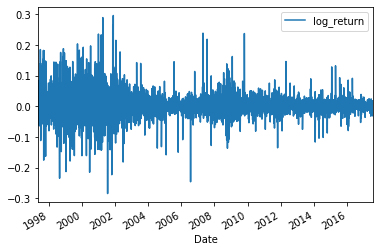

(-12.191040574601981, 1.28559484917303e-22, 33, 5049, {'1%': -3.431645826447749, '5%': -2.862112616389892, '10%': -2.5670748041885108}, -18629.91179848012)


In [61]:
amazon_prct_change_log_return = pd.DataFrame(amazon_prct_change['log_return'])
fig, ax = plt.subplots()
amazon_prct_change_log_return.plot(ax=ax)
plt.show()

result_log = adfuller(amazon_prct_change_log_return['log_return'])
print(result_log)

This time series is now stationary and ready for modeling

### Generating ARMA data <br><br>
In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.<br><br>

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.<br><br>

Remember:<br><br>

The first value of each list of AR and MA coefficients must be 1 for the lag-0 term.
For any model ARMA(p,q), the list ar_coefs will have p+1 values and the ma_coefs will have q+1 values.

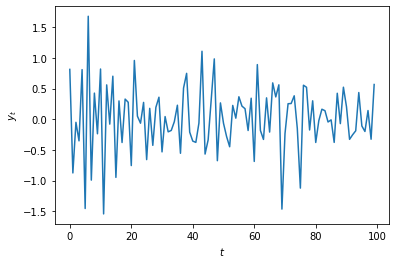

In [62]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

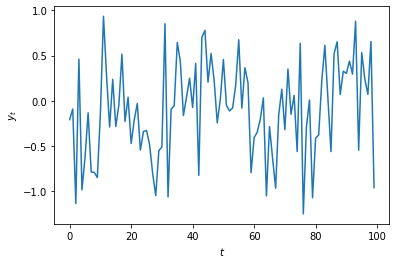

In [63]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

Set the coefficients for a model with form yt=−0.2yt−1+0.3ϵt−1+0.4ϵt−2+ϵt.

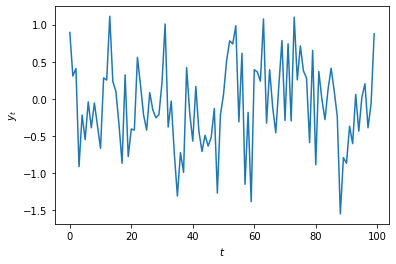

In [64]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1,0.2]
ma_coefs = [1,0.3,0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### Fitting Prelude
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [65]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()

### Fitting AR and MA models
In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a pandas DataFrame available in your environment called sample. It has two columns of different time series data.

In [ ]:
# Instantiate the model
model = ARMA(df, order=(2,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

ARMAX Model

In [ ]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2,1), 
             exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

### Generating one-step-ahead predictions
It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as results.

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

In [ ]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Dynamic Forecasts

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [ ]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

### Plotting dynamic forecasts
Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment.

In [ ]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Unrolling the arma model by calculating the simple differences and integrating back the values


In [ ]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

In [ ]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

### Using the simple ARIMA model

In [68]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

### AR or MA ?

![](ARORMA.png)

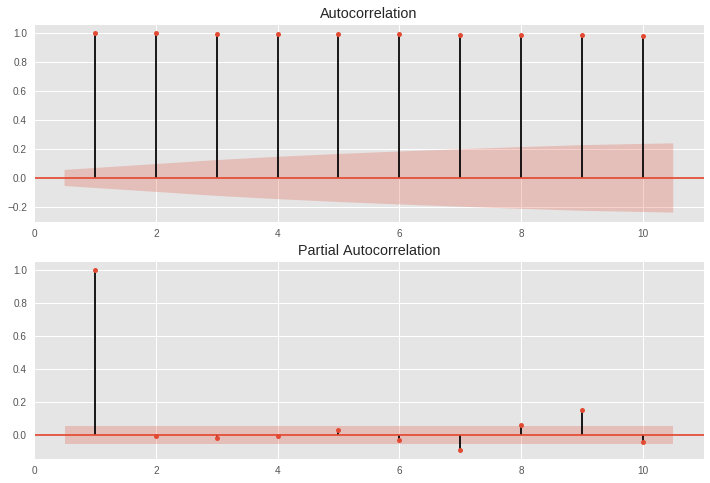

In [84]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(amazon, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(amazon, lags=10, zero=False, ax=ax2)

plt.show()

### Order of earthquakes<br>
The earthquakes time series earthquake, the plot_acf(), and plot_pacf() functions, and the SARIMAX model class are available in your environment.

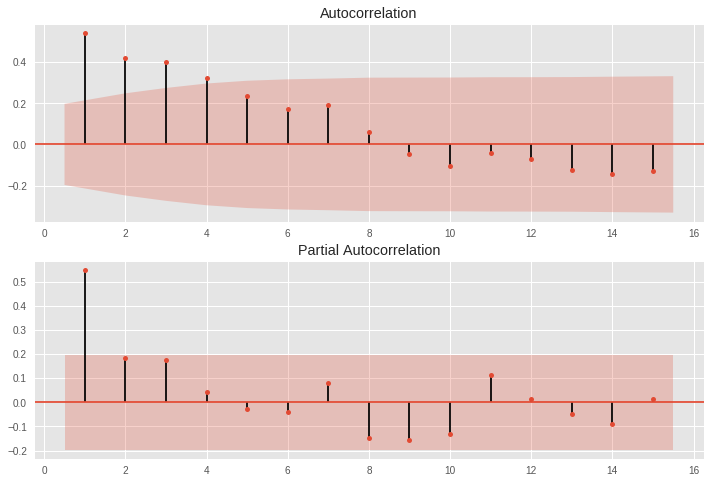

In [85]:
plt.style.use('ggplot')

# Load in the time series
earthquakes = pd.read_csv('data/earthquakes.csv', 
                 index_col='date',
                 parse_dates=True)

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(earthquakes['earthquakes_per_year'], lags=15, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(earthquakes['earthquakes_per_year'], lags=15, zero=False, ax=ax2)
plt.show()

### Creating the most apt time series model based on the above plots:
Based on the above graphs, the most apt model is AR(1)

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate model
model = SARIMAX(earthquakes['earthquakes_per_year'], order =(1,0,0))

# Train model
results = model.fit()

results.summary()

/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Sat, 18 Jan 2020   AIC                            666.646
Time:                          19:08:54   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
===================================================================================
Ljung-Box (Q):                       51.06   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.11   Prob(JB):                         0.10
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AIC vs BIC : The hunt for a better model based on problem <br>

##### Searching over model order <br>
In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below.<br> In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

In [91]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(earthquakes['earthquakes_per_year'], order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))
        
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN wil

   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892
   p  q         AIC         BIC
4  1  1  647.132300  654.917660
5  1  2  648.738566  659.119046
7  2  1  648.842840  659.223319
8  2  2  648.850644  661.826244
6  2  0  656.028374  663.813734
3  1  0  666.645526  671.835765
2  0  2  761.067479  768.852838
1  0  1  799.674173  804.864412
0  0  0  888.429772  891.024892


### Model Diagnostics:

##### Mean absolute error
Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

numpy has been imported into your environment as np and the earthquakes time series is available for you as earthquake.

/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


4.755625669545705


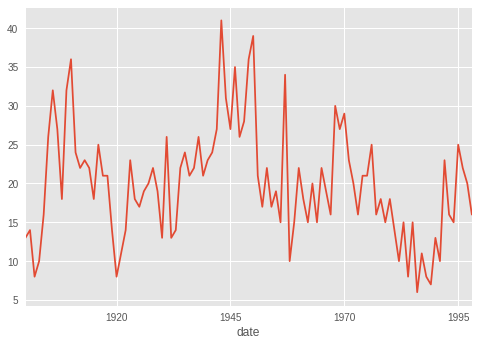

In [92]:
earthquake = earthquakes['earthquakes_per_year']

# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

### Diagnostic summary statistics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

![](diagnostic_test.png)

In [93]:
# Create and fit model
model1 = SARIMAX(earthquake, order=(1,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

                            Statespace Model Results                            
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -320.566
Date:                  Sat, 18 Jan 2020   AIC                            647.132
Time:                          19:54:11   BIC                            654.918
Sample:                      01-01-1900   HQIC                           650.282
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.014     70.282      0.000       0.962       1.017
ma.L1         -0.5517      0.089     -6.198      0.000      -0.726      -0.377
sigma2        37.0254      4.980    

/home/sagnik/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


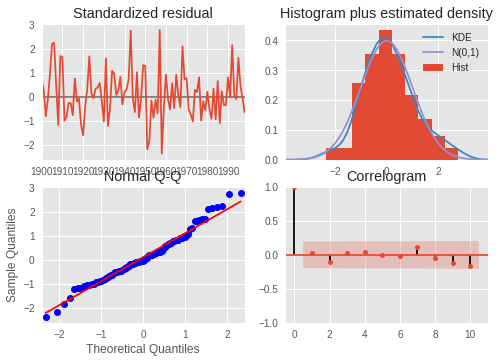

In [96]:
# Create the 4 diagostics plots
results1.plot_diagnostics()
plt.show()